In [10]:
!pip install mmh3
!pip install bitarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import math
import mmh3
from bitarray import bitarray
import random
import seaborn as sns

In [14]:
import math
import mmh3
from bitarray import bitarray


class BloomFilter(object):
    '''
    Class for Bloom filter, using murmur3 hash function
    '''

    def __init__(self, items_count, bit_array_len, k=0):
        '''
        items_count : int
            Number of items expected to be stored in bloom filter
        fp_prob : float
            False Positive probability in decimal
        '''

        # Size of bit array to use
        self.size = bit_array_len

        # number of hash functions to use
        if k == 0:
            self.hash_count = self.get_hash_count(self.size, items_count)
        else:
            self.hash_count = k

        # Bit array of given size
        self.bit_array = bitarray(self.size)

        # initialize all bits as 0
        self.bit_array.setall(0)

    def add(self, item):
        '''
        Add an item in the filter
        '''
        digests = []
        for i in range(self.hash_count):
            # create digest for given item.
            # i work as seed to mmh3.hash() function
            # With different seed, digest created is different
            digest = mmh3.hash(item, i) % self.size
            digests.append(digest)

            # set the bit True in bit_array
            self.bit_array[digest] = True

    def check(self, item):
        '''
        Check for existence of an item in filter
        '''
        for i in range(self.hash_count):
            digest = mmh3.hash(item, i) % self.size
            if self.bit_array[digest] == False:
                # if any of bit is False then,its not present
                # in filter
                # else there is probability that it exist
                return False
        return True

    @classmethod
    def get_hash_count(self, m, n):
        '''
        Returns the optimal num of hash function(k) to be used using
        following formula
        k = (m/n) * lg(2)

        m : int
            size of bit array
        n : int
            number of items expected to be stored in filter
        '''
        k = (m / n) * math.log(2)
        return int(k)



## Part B

In [37]:
def apply_check_false_positive(num_of_songs_in_history, num_of_recommended_songs, bit_array_len, k):
  songs_in_history = [random.getrandbits(32) for i in range(num_of_songs_in_history)]
  recommended_songs = [random.getrandbits(32) for i in range(num_of_recommended_songs)]
  intersection_list = [i for i in recommended_songs if i in songs_in_history]
  bloom_filter = BloomFilter(num_of_songs_in_history, bit_array_len, k)
  # lets add the songs in the history to our bloom filter!!
  for song in songs_in_history:
    bloom_filter.add(str(song))
  # now, lets check out how many recommended songs are falsely recognised to be in the history:
  false_positive_songs = []
  for song in recommended_songs:
    song_exists = bloom_filter.check(str(song))
    if song_exists:
      false_positive_songs.append(song)
  return len(false_positive_songs) - len(intersection_list)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


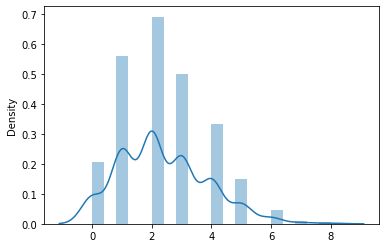

In [35]:
num_of_songs_in_history, num_of_recommended_songs, bit_array_len = 1000, 20, 4482
num_of_false_positive_list = []
for i in range(1000):
  num_of_false_positive = apply_check_false_positive(num_of_songs_in_history, num_of_recommended_songs, bit_array_len)
  num_of_false_positive_list.append(num_of_false_positive) 

sns.distplot(num_of_false_positive_list)

## Part C

There are 2 ways using which we can decrease the number of false postitives:


1.   By increasing the length of false bit array
2.   By increasing the number of filters

Further explaination about their effect is presented in the document.



## Part D

1.The effect of increasing bit array length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


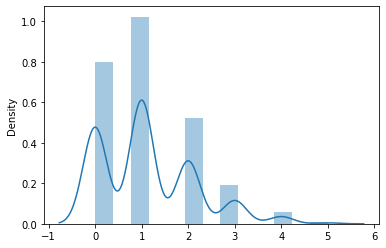

In [36]:
num_of_songs_in_history, num_of_recommended_songs, bit_array_len = 1000, 20, 6000
num_of_false_positive_list = []
for i in range(1000):
  num_of_false_positive = apply_check_false_positive(num_of_songs_in_history, num_of_recommended_songs, bit_array_len)
  num_of_false_positive_list.append(num_of_false_positive) 

sns.distplot(num_of_false_positive_list)

2.The effect of increasing the number of filters

In [39]:
def get_hash_count(m, n):
        '''
        Returns the optimal num of hash function(k) to be used using
        following formula
        k = (m/n) * lg(2)

        m : int
            size of bit array
        n : int
            number of items expected to be stored in filter
        '''
        k = (m / n) * math.log(2)
        return int(k)

number of filters:  4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


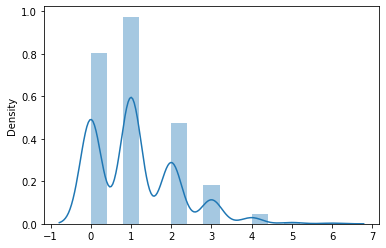

In [40]:
num_of_songs_in_history, num_of_recommended_songs, bit_array_len = 1000, 20, 6000
num_of_false_positive_list = []
for i in range(1000):
  num_of_false_positive = apply_check_false_positive(num_of_songs_in_history, num_of_recommended_songs, bit_array_len, 0)
  num_of_false_positive_list.append(num_of_false_positive) 
print("number of filters: ", get_hash_count(bit_array_len, num_of_songs_in_history))
sns.distplot(num_of_false_positive_list)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


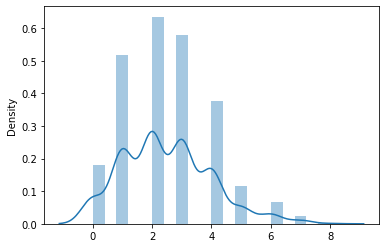

In [41]:
num_of_songs_in_history, num_of_recommended_songs, bit_array_len = 1000, 20, 6000
num_of_false_positive_list = []
for i in range(1000):
  num_of_false_positive = apply_check_false_positive(num_of_songs_in_history, num_of_recommended_songs, bit_array_len, 10)
  num_of_false_positive_list.append(num_of_false_positive) 
sns.distplot(num_of_false_positive_list)